In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [2]:
data = pd.read_csv("Dados/train.csv")

In [3]:
dt = data.drop('id', axis=1)

In [4]:
dt['Class'].value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [5]:
print("=" * 60)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 60)
print(f"\n📊 Shape: {data.shape[0]:,} linhas x {data.shape[1]} colunas")
print(f"\n📋 Colunas: {list(data.columns)}")
print(f"\n🔍 Tipos de dados:\n{data.dtypes.value_counts()}")
print(f"\n❓ Valores nulos:\n{data.isnull().sum().sum()} valores nulos no total")
print("\n📈 Estatísticas descritivas:")
data.describe()

INFORMAÇÕES GERAIS DO DATASET

📊 Shape: 227,845 linhas x 32 colunas

📋 Colunas: ['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

🔍 Tipos de dados:
float64    30
int64       2
Name: count, dtype: int64

❓ Valores nulos:
0 valores nulos no total

📈 Estatísticas descritivas:


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,142516.559508,94885.093704,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,...,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,88.176298,0.001729
std,82225.135238,47488.415034,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,...,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,250.722602,0.041548
min,1.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71255.000000,54228.000000,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,...,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,5.640000,0.000000
50%,142583.000000,84805.000000,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,...,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,22.000000,0.000000
75%,213708.000000,139364.000000,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,...,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,77.490000,0.000000
max,284807.000000,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


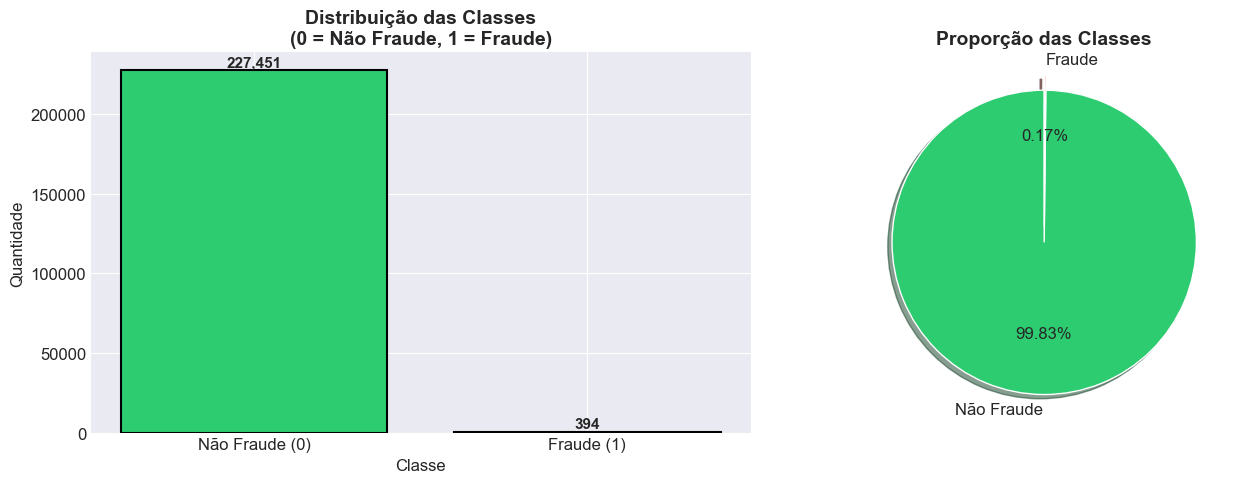


🔢 Estatísticas de Balanceamento:
   • Não Fraude (0): 227,451 (99.83%)
   • Fraude (1): 394 (0.17%)
   • Razão de desbalanceamento: 1:577


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

class_counts = data['Class'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1 = axes[0]
bars = ax1.bar(class_counts.index.astype(str), class_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Classe', fontsize=12)
ax1.set_ylabel('Quantidade', fontsize=12)
ax1.set_title('Distribuição das Classes\n(0 = Não Fraude, 1 = Fraude)', fontsize=14, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Não Fraude (0)', 'Fraude (1)'])

for bar, count in zip(bars, class_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2 = axes[1]
explode = (0, 0.1)
wedges, texts, autotexts = ax2.pie(class_counts.values, labels=['Não Fraude', 'Fraude'], 
                                    autopct='%1.2f%%', colors=colors, explode=explode,
                                    shadow=True, startangle=90)
ax2.set_title('Proporção das Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Imprimir estatísticas
print(f"\n🔢 Estatísticas de Balanceamento:")
print(f"   • Não Fraude (0): {class_counts[0]:,} ({class_counts[0]/len(data)*100:.2f}%)")
print(f"   • Fraude (1): {class_counts[1]:,} ({class_counts[1]/len(data)*100:.2f}%)")
print(f"   • Razão de desbalanceamento: 1:{class_counts[0]//class_counts[1]}")

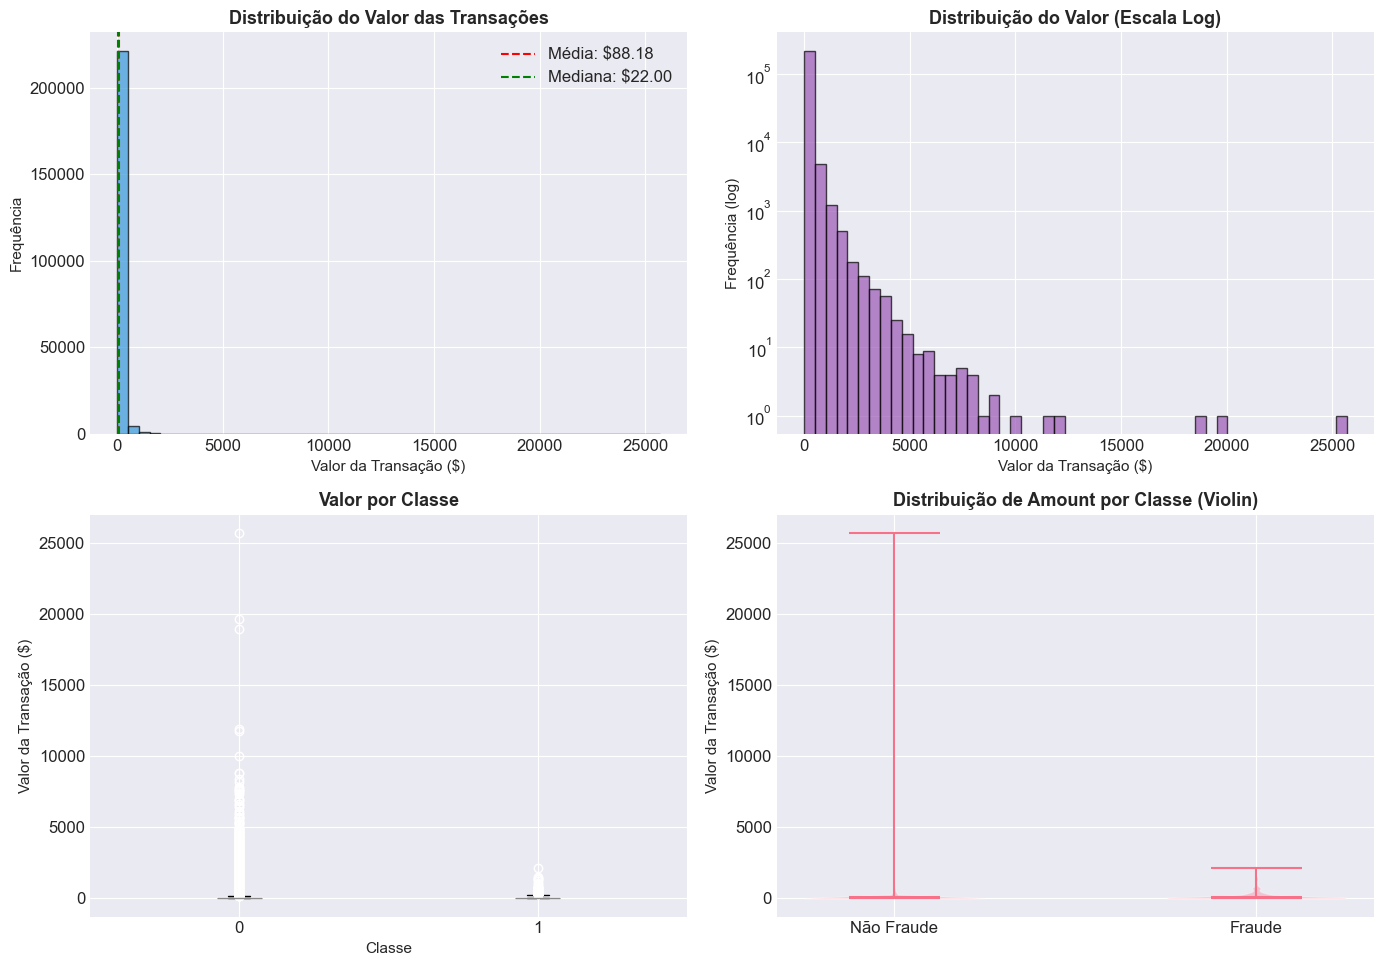


💰 Estatísticas de Amount:
   • Média: $88.18
   • Mediana: $22.00
   • Desvio Padrão: $250.72
   • Mínimo: $0.00
   • Máximo: $25691.16


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.hist(data['Amount'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Valor da Transação ($)', fontsize=11)
ax1.set_ylabel('Frequência', fontsize=11)
ax1.set_title('Distribuição do Valor das Transações', fontsize=13, fontweight='bold')
ax1.axvline(data['Amount'].mean(), color='red', linestyle='--', label=f'Média: ${data["Amount"].mean():.2f}')
ax1.axvline(data['Amount'].median(), color='green', linestyle='--', label=f'Mediana: ${data["Amount"].median():.2f}')
ax1.legend()

ax2 = axes[0, 1]
ax2.hist(data['Amount'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7, log=True)
ax2.set_xlabel('Valor da Transação ($)', fontsize=11)
ax2.set_ylabel('Frequência (log)', fontsize=11)
ax2.set_title('Distribuição do Valor (Escala Log)', fontsize=13, fontweight='bold')

ax3 = axes[1, 0]
data.boxplot(column='Amount', by='Class', ax=ax3)
ax3.set_xlabel('Classe', fontsize=11)
ax3.set_ylabel('Valor da Transação ($)', fontsize=11)
ax3.set_title('Valor por Classe', fontsize=13, fontweight='bold')
plt.suptitle('')

ax4 = axes[1, 1]
fraud_amounts = data[data['Class'] == 1]['Amount']
non_fraud_amounts = data[data['Class'] == 0]['Amount']
parts = ax4.violinplot([non_fraud_amounts, fraud_amounts], positions=[0, 1], showmeans=True, showmedians=True)
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Não Fraude', 'Fraude'])
ax4.set_ylabel('Valor da Transação ($)', fontsize=11)
ax4.set_title('Distribuição de Amount por Classe (Violin)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas
print(f"\n💰 Estatísticas de Amount:")
print(f"   • Média: ${data['Amount'].mean():.2f}")
print(f"   • Mediana: ${data['Amount'].median():.2f}")
print(f"   • Desvio Padrão: ${data['Amount'].std():.2f}")
print(f"   • Mínimo: ${data['Amount'].min():.2f}")
print(f"   • Máximo: ${data['Amount'].max():.2f}")

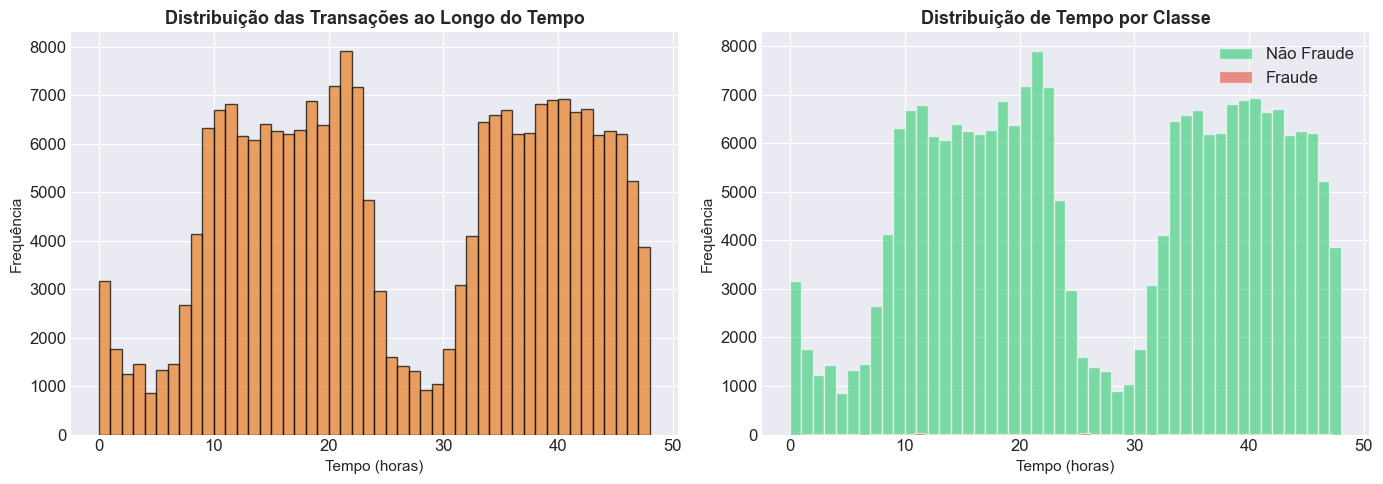

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.hist(data['Time'] / 3600, bins=48, color='#e67e22', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Tempo (horas)', fontsize=11)
ax1.set_ylabel('Frequência', fontsize=11)
ax1.set_title('Distribuição das Transações ao Longo do Tempo', fontsize=13, fontweight='bold')

ax2 = axes[1]
ax2.hist(data[data['Class'] == 0]['Time'] / 3600, bins=48, alpha=0.6, label='Não Fraude', color='#2ecc71')
ax2.hist(data[data['Class'] == 1]['Time'] / 3600, bins=48, alpha=0.6, label='Fraude', color='#e74c3c')
ax2.set_xlabel('Tempo (horas)', fontsize=11)
ax2.set_ylabel('Frequência', fontsize=11)
ax2.set_title('Distribuição de Tempo por Classe', fontsize=13, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

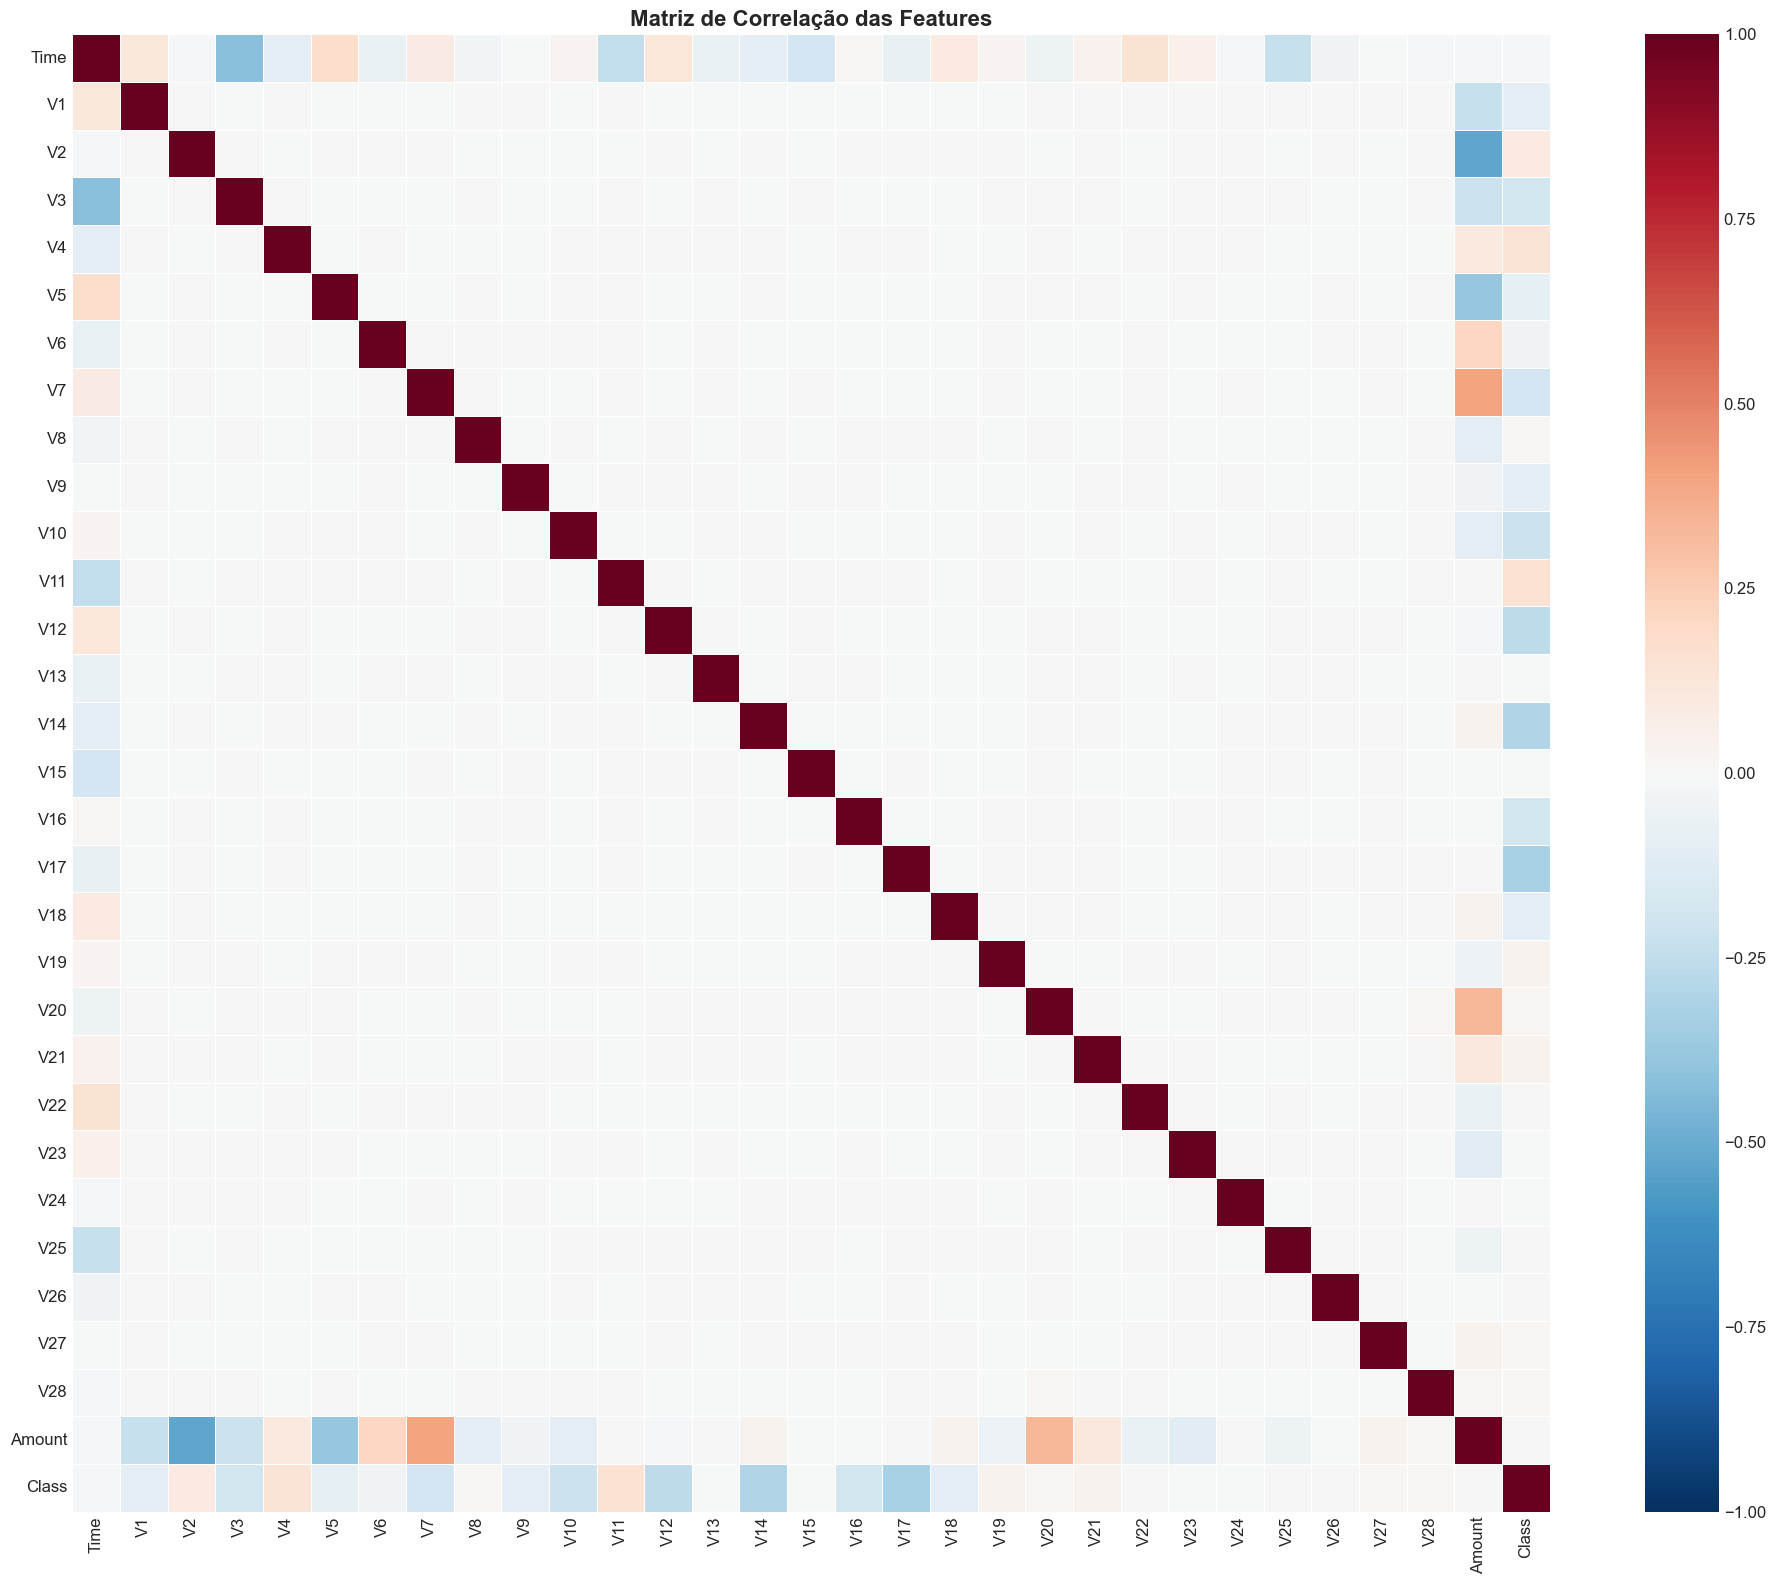


🔗 Top 10 Features mais correlacionadas com 'Class':
   1. V17: 0.3219
   2. V14: 0.3011
   3. V12: 0.2600
   4. V10: 0.2179
   5. V3: 0.1941
   6. V16: 0.1938
   7. V7: 0.1862
   8. V11: 0.1537
   9. V4: 0.1350
   10. V18: 0.1087


In [9]:
plt.figure(figsize=(20, 16))

corr_matrix = data.drop('id', axis=1).corr()

sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0,
            linewidths=0.5, square=True, vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔗 Top 10 Features mais correlacionadas com 'Class':")
corr_with_class = corr_matrix['Class'].drop('Class').abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(corr_with_class.head(10).items(), 1):
    print(f"   {i}. {feature}: {corr:.4f}")

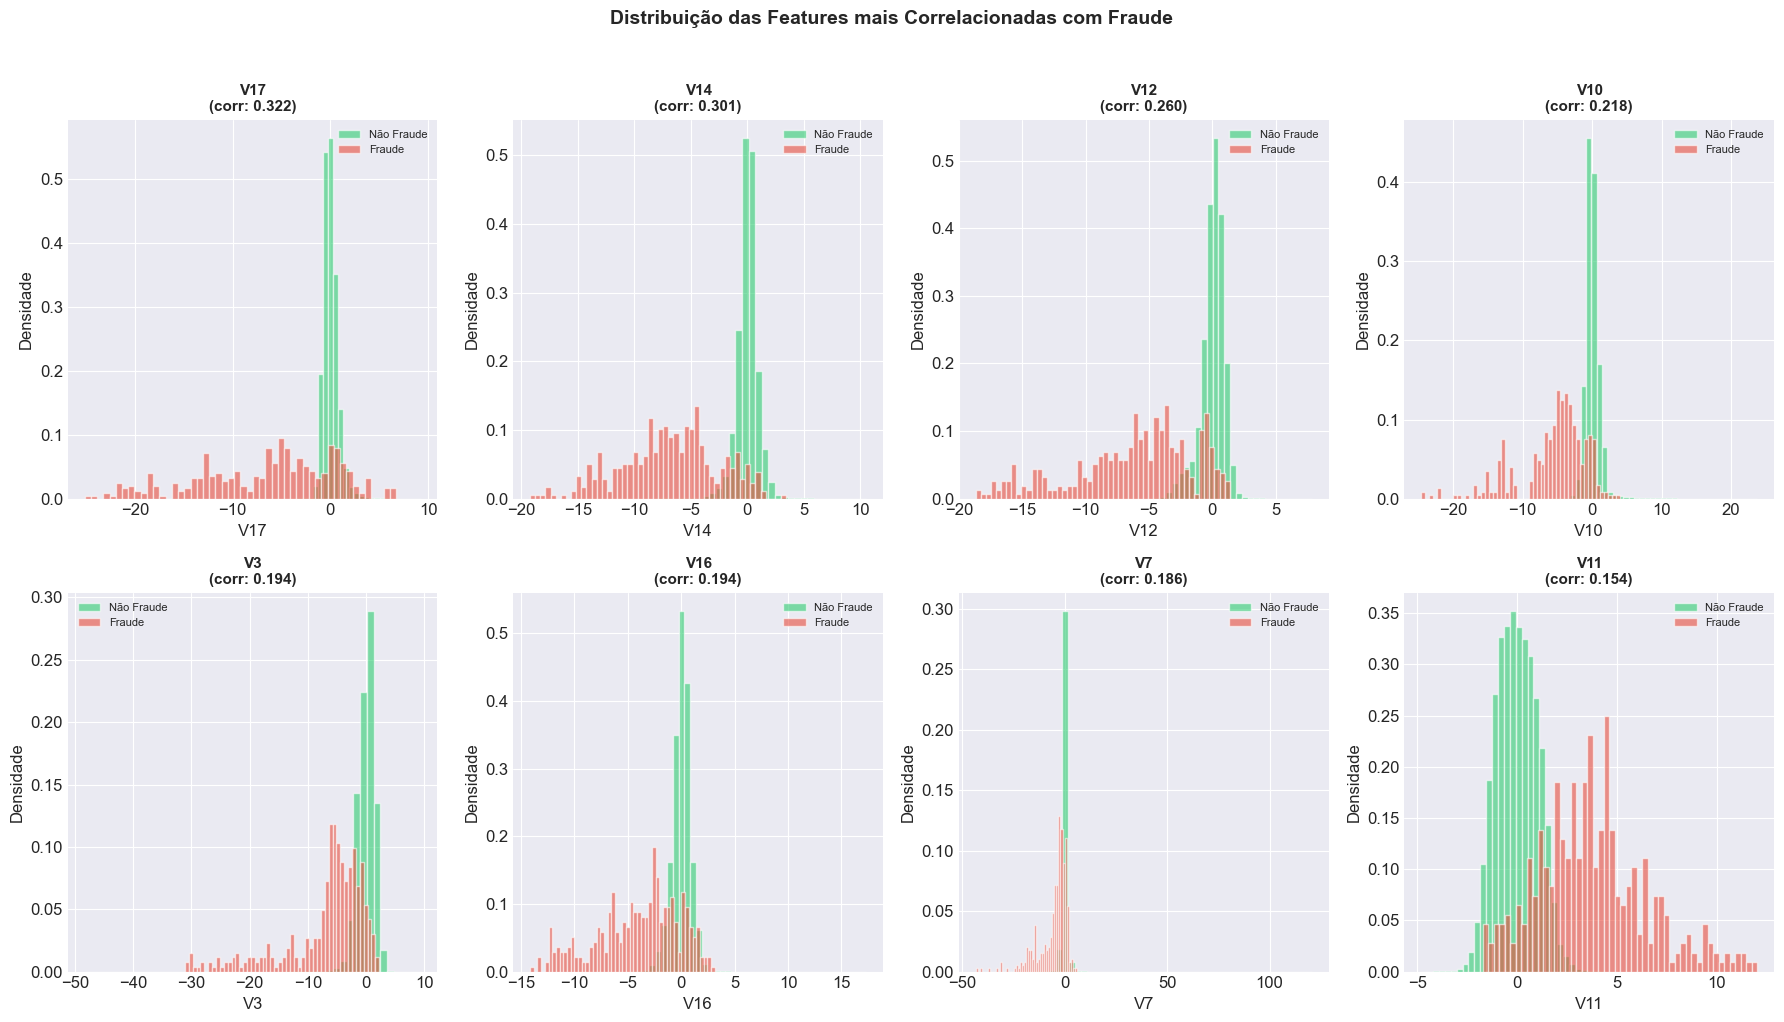

In [10]:
top_features = corr_with_class.head(8).index.tolist()

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    
    # Plot para não fraude
    ax.hist(data[data['Class'] == 0][feature], bins=50, alpha=0.6, 
            label='Não Fraude', color='#2ecc71', density=True)
    # Plot para fraude
    ax.hist(data[data['Class'] == 1][feature], bins=50, alpha=0.6, 
            label='Fraude', color='#e74c3c', density=True)
    
    ax.set_title(f'{feature}\n(corr: {corr_with_class[feature]:.3f})', fontsize=11, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Densidade')
    ax.legend(fontsize=8)

plt.suptitle('Distribuição das Features mais Correlacionadas com Fraude', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\jairo\AppData\Local\Temp\ipykernel_14088\747619249.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([non_fraud_data, fraud_data], labels=['Não Fraude', 'Fraude'],
C:\Users\jairo\AppData\Local\Temp\ipykernel_14088\747619249.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([non_fraud_data, fraud_data], labels=['Não Fraude', 'Fraude'],
C:\Users\jairo\AppData\Local\Temp\ipykernel_14088\747619249.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([non_fraud_data, fraud_data], labels=['Não Fraude', 'Fraude'],
C:\Users\jairo\AppData\Local\Temp\ipykernel_14088

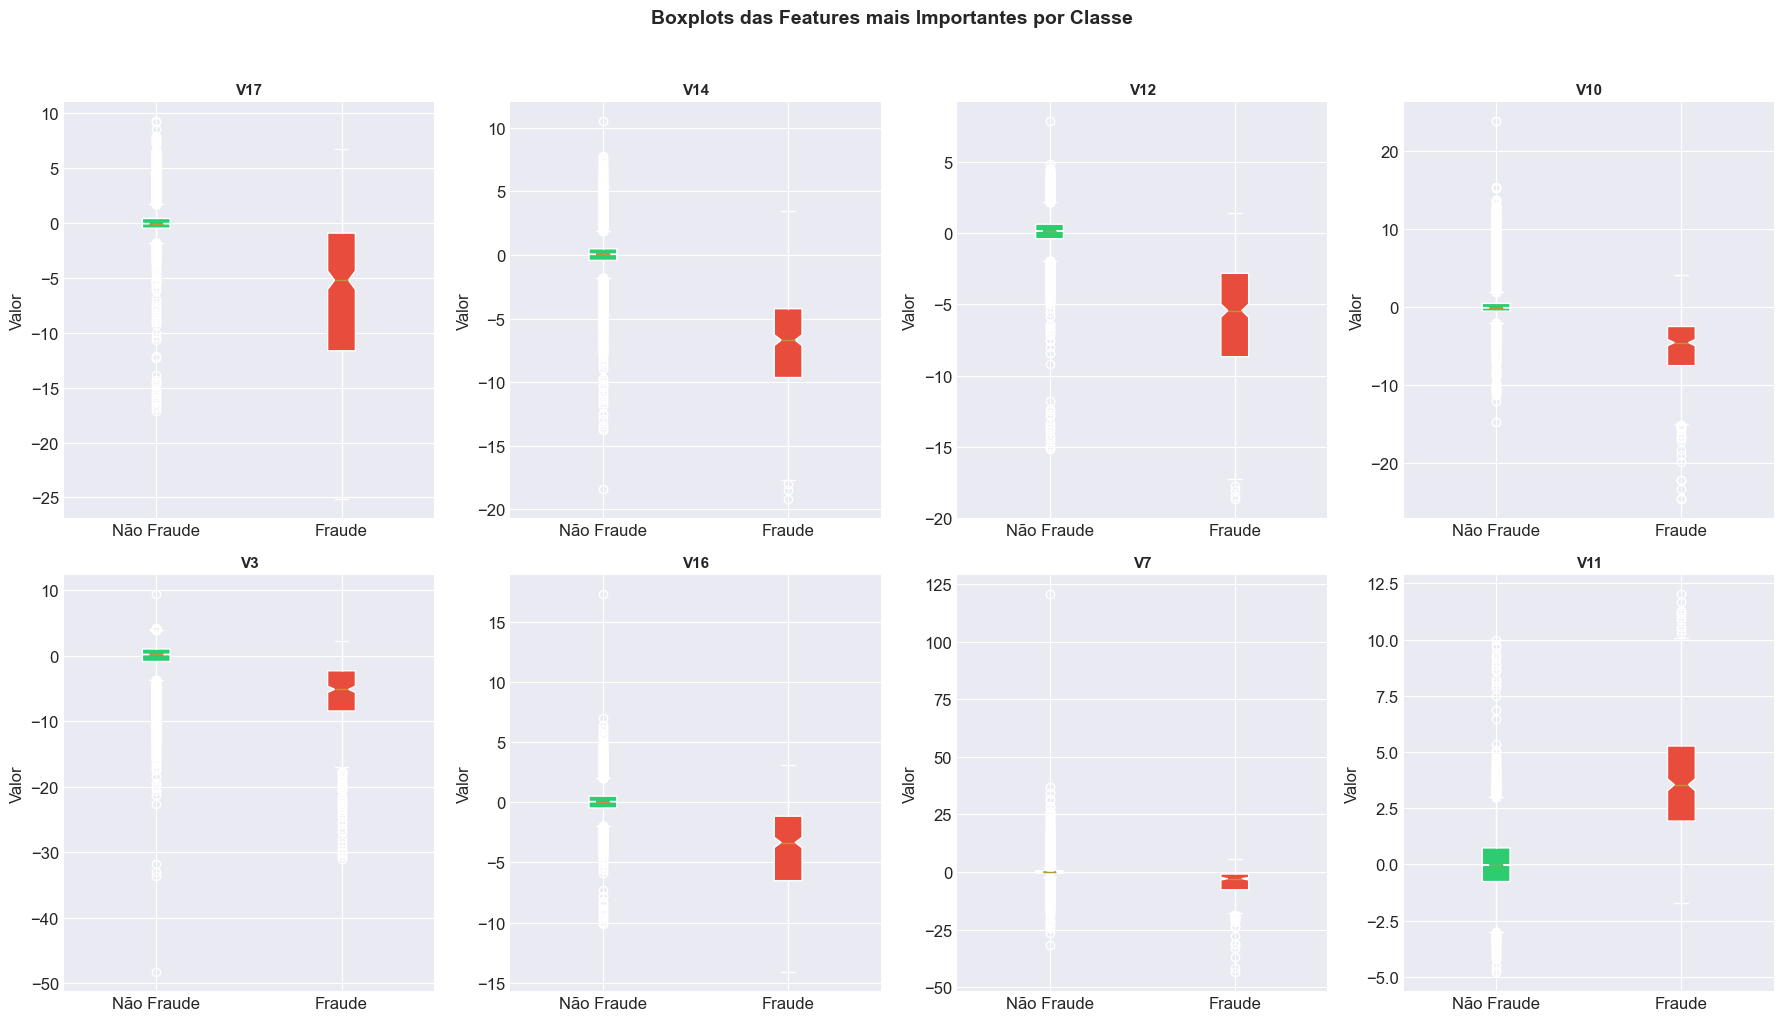

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    
    fraud_data = data[data['Class'] == 1][feature]
    non_fraud_data = data[data['Class'] == 0][feature]
    
    bp = ax.boxplot([non_fraud_data, fraud_data], labels=['Não Fraude', 'Fraude'], 
                    patch_artist=True, notch=True)
    
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor')

plt.suptitle('Boxplots das Features mais Importantes por Classe', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print("=" * 70)
print("COMPARAÇÃO ESTATÍSTICA: FRAUDE vs NÃO FRAUDE")
print("=" * 70)

comparison_features = ['Amount', 'Time'] + top_features[:6]

stats_data = []
for feat in comparison_features:
    stats_data.append({
        'Feature': feat,
        'Média (Não Fraude)': non_fraud[feat].mean(),
        'Média (Fraude)': fraud[feat].mean(),
        'Std (Não Fraude)': non_fraud[feat].std(),
        'Std (Fraude)': fraud[feat].std()
    })

stats_df = pd.DataFrame(stats_data)
print(stats_df.to_string(index=False))

COMPARAÇÃO ESTATÍSTICA: FRAUDE vs NÃO FRAUDE
Feature  Média (Não Fraude)  Média (Fraude)  Std (Não Fraude)  Std (Fraude)
 Amount           88.111486      125.591472        250.697751    262.350158
   Time        94905.972262    82832.177665      47484.884567  48052.566299
    V17            0.011702       -6.529843          0.746336      6.928844
    V14            0.011920       -6.915098          0.894842      4.289203
    V12            0.013501       -6.222169          0.942877      4.720041
    V10            0.009462       -5.687216          1.040852      4.959383
     V3            0.011860       -7.068378          1.457622      7.166449
    V16            0.005983       -4.072418          0.843254      3.863078


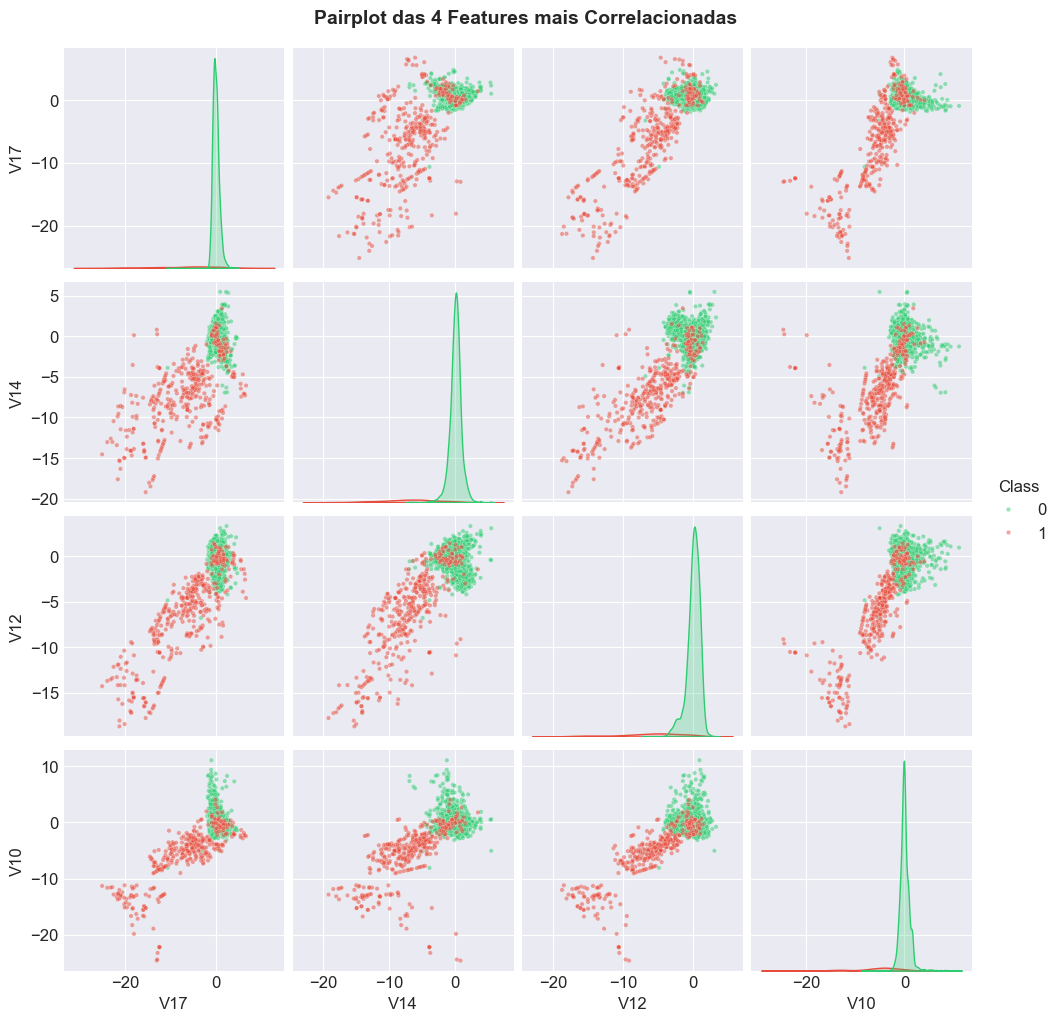

In [13]:
sample_size = 5000
sample_data = pd.concat([
    non_fraud.sample(min(sample_size, len(non_fraud)), random_state=42),
    fraud.sample(min(sample_size, len(fraud)), random_state=42)
])

# Selecionar top 4 features para pairplot
pairplot_features = top_features[:4] + ['Class']

g = sns.pairplot(sample_data[pairplot_features], hue='Class', 
                 palette={0: '#2ecc71', 1: '#e74c3c'},
                 diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
g.fig.suptitle('Pairplot das 4 Features mais Correlacionadas', y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [14]:
print("=" * 70)
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 70)

print(f"""
📊 DATASET:
   • Total de transações: {len(data):,}
   • Features: {len(data.columns)} colunas
   • Período: {data['Time'].max() / 3600:.1f} horas de transações

⚖️ BALANCEAMENTO:
   • Transações legítimas: {len(non_fraud):,} ({len(non_fraud)/len(data)*100:.2f}%)
   • Transações fraudulentas: {len(fraud):,} ({len(fraud)/len(data)*100:.2f}%)
   • Razão de desbalanceamento: 1:{len(non_fraud)//len(fraud)}

💰 VALOR DAS TRANSAÇÕES (Amount):
   • Média geral: ${data['Amount'].mean():.2f}
   • Média fraudes: ${fraud['Amount'].mean():.2f}
   • Média não-fraudes: ${non_fraud['Amount'].mean():.2f}

🔗 TOP 5 FEATURES MAIS CORRELACIONADAS COM FRAUDE:
""")

for i, (feat, corr) in enumerate(corr_with_class.head(5).items(), 1):
    direction = "positiva" if data[[feat, 'Class']].corr().iloc[0, 1] > 0 else "negativa"
    print(f"   {i}. {feat}: {corr:.4f} (correlação {direction})")

print("""
📝 OBSERVAÇÕES IMPORTANTES:
   • Dataset altamente desbalanceado - técnicas de balanceamento necessárias
   • Features V1-V28 são resultado de PCA (anonimizadas)
   • Amount e Time são as únicas features originais
   • Algumas features mostram clara separação entre classes
""")

📋 RESUMO DA ANÁLISE EXPLORATÓRIA

📊 DATASET:
   • Total de transações: 227,845
   • Features: 32 colunas
   • Período: 48.0 horas de transações

⚖️ BALANCEAMENTO:
   • Transações legítimas: 227,451 (99.83%)
   • Transações fraudulentas: 394 (0.17%)
   • Razão de desbalanceamento: 1:577

💰 VALOR DAS TRANSAÇÕES (Amount):
   • Média geral: $88.18
   • Média fraudes: $125.59
   • Média não-fraudes: $88.11

🔗 TOP 5 FEATURES MAIS CORRELACIONADAS COM FRAUDE:

   1. V17: 0.3219 (correlação negativa)
   2. V14: 0.3011 (correlação negativa)
   3. V12: 0.2600 (correlação negativa)
   4. V10: 0.2179 (correlação negativa)
   5. V3: 0.1941 (correlação negativa)

📝 OBSERVAÇÕES IMPORTANTES:
   • Dataset altamente desbalanceado - técnicas de balanceamento necessárias
   • Features V1-V28 são resultado de PCA (anonimizadas)
   • Amount e Time são as únicas features originais
   • Algumas features mostram clara separação entre classes



In [15]:
y=dt['Class']
dt = dt.drop("Class", axis=1)

dt.to_csv('Dados/Xtrain.csv', index=False)
y.to_csv('Dados/ytrain.csv', index=False)

